<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/data_ev_unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by ev on Unsplash</figcaption>
</div>

# Introduction to machine learning in Python with scikit-learn

**Applied Programming - Summer term 2020 - FOM Hochschule für Oekonomie und Management - Cologne**

**Lecture 06 - May 07, 2020**

## Table of contents
* [Recap and outlook](#recap)
* [Business understanding](#businessunderstanding)
* [Data understanding](#dataunderstanding)
* [Data preparation](#preparation)
* [Modeling and evaluation](#modeling)
* [Homework](#homework)
* [References](#references)

## Recap and outlook<a class="anchor" id="recap"></a>
In the last lecture we learned about important packages to extend the functionality of Python. Concerning machine learning, we looked at the scikit-learn package.

> *Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.* [[1]](#sklearn2020)

Important features of the scikit-learn library are:
* Supervised and unsupervised learning algorithms
* Clean, uniform, and streamlined API
* In-depth, well understandable documentation with references to scientific papers

In this lecture we will mainly focus on the implementation of the different machine learning algorithms - so we will primarily discuss the section modeling in CRISP-DM. In the homework following this lecture you will deepen the preprocessing by means of an example data set.

## Business understanding<a class="anchor" id="businessunderstanding"></a>
A major issue for businesses that assign appointments to their customers is not showing up. This is especially important for medical offices, as treatment times are reserved and then expire unused, although others would have needed them. The reduction of such cases is therefore in the interest of all parties involved. Medical practices do not suffer losses due to unused capacity and other patients are given treatment. Support in the form of a predictive algorithm would therefore be highly desirable.

What possible measures could be taken if the prediction is successful? If a patient is found to have an increased risk of no-shows, it is possible to deliberately over-plan - i.e. to double the number of treatment appointments. Or measures can be introduced to make the patient aware of the appointment. Various applications for a predictive no-show score are therefore conceivable.

The data set used here includes appointments and information on the patient from the Brazilian city of Vitória [[2]](#jonihoppen2017). Vitória has about 360.000 inhabitants and is located 530km north-east of Rio de Janeiro on the Atlantic coast.

## Data understanding<a class="anchor" id="dataunderstanding"></a>
First we load the data into the notebook and examine the scope, type and properties of the data.

The documentation attached to the data includes the following descriptions of the columns:
* ``PatientId``: Identification of a patient
* ``AppointmentID``: Identification of each appointment
* ``Gender``: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man
* ``ScheduledDay``: The day someone called or registered the appointment, this is before appointment of course
* ``AppointmentDay``: The day of the actuall appointment, when they have to visit the doctor
* ``Age``: How old is the patient
* ``Neighbourhood``: Where the appointment takes place
* ``Scholarship``: True of false; state social support programme
* ``Hipertension``: True or false
* ``Diabetes``: True or false
* ``Alcoholism``: True or false
* ``Handcap``: True or false
* ``SMS_received``: 1 or more messages sent to the patient
* ``No-show``: True or false.

For the examination of the data, keep the following questions in mind:
* *What stands out to you?*
* *Which pre-processing steps will be necessary?*
* *What is the name of the label variable for which supervised learning can take place?*
* *Is it a classification or regression problem?*

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

In [2]:
# Load the data and a first look at a random sample
df = pd.read_csv('dat/noshow.csv')
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
84674,2.759575e+13,5756417,F,2016-06-01T08:17:04Z,2016-06-01T00:00:00Z,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No
3635,9.673194e+14,5523159,F,2016-03-29T16:09:39Z,2016-05-03T00:00:00Z,37,RESISTÊNCIA,0,0,0,0,0,1,No
16605,3.951641e+12,5693080,F,2016-05-12T17:33:56Z,2016-05-20T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,0,Yes
103942,9.173245e+14,5654129,F,2016-05-03T13:54:51Z,2016-06-03T00:00:00Z,24,SANTO ANDRÉ,0,0,0,0,0,1,Yes
274,3.995366e+12,5641070,F,2016-04-29T12:16:28Z,2016-04-29T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
48969,7.988999e+14,5690281,F,2016-05-12T09:48:29Z,2016-05-17T00:00:00Z,68,JARDIM DA PENHA,0,1,0,0,0,0,No
76571,6.267396e+14,5697447,M,2016-05-13T15:56:43Z,2016-05-13T00:00:00Z,13,ANDORINHAS,1,0,0,0,0,0,No
6694,4.388872e+14,5753718,F,2016-05-31T14:39:42Z,2016-05-31T00:00:00Z,31,JESUS DE NAZARETH,0,0,0,0,0,0,No
54876,1.554979e+11,5723075,M,2016-05-20T07:56:23Z,2016-05-20T00:00:00Z,6,ILHA DO PRÍNCIPE,0,0,0,0,1,0,No
3235,4.983944e+13,5530556,F,2016-03-31T08:25:33Z,2016-05-03T00:00:00Z,49,MARIA ORTIZ,0,0,0,0,0,1,Yes


In [3]:
df['Scholarship'].dtypes

dtype('int64')

In [4]:
# Basic statistics of all columns
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [5]:
# Check the columns types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format = '%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format = '%Y-%m-%dT%H:%M:%SZ')
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
41803,2.494773e+12,5696124,F,2016-05-13 11:46:18,2016-05-17,45,SANTO ANTÔNIO,0,0,0,0,0,0,No
64389,7.331246e+13,5649234,F,2016-05-02 18:36:41,2016-05-04,51,JARDIM CAMBURI,0,1,0,0,0,0,Yes
57641,1.936496e+11,5720141,F,2016-05-19 13:22:56,2016-05-20,74,SANTO ANTÔNIO,0,1,1,0,0,0,Yes
28633,3.574998e+14,5695060,M,2016-05-13 09:25:19,2016-05-20,3,FORTE SÃO JOÃO,0,0,0,0,0,0,Yes
22909,8.952972e+12,5717065,F,2016-05-19 07:30:38,2016-05-20,20,GURIGICA,0,0,0,0,0,0,Yes


In [7]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [8]:
# Check the boolean characterics
print('Values of Gender:       {}'.format(df['Gender'].unique()))
print('Values of Scholarship:  {}'.format(df['Scholarship'].unique()))
print('Values of Hipertension: {}'.format(df['Hipertension'].unique()))
print('Values of Diabetes:     {}'.format(df['Diabetes'].unique()))
print('Values of Alcoholism:   {}'.format(df['Alcoholism'].unique()))
print('Values of Handcap:      {}'.format(df['Handcap'].unique()))
print('Values of SMS_received: {}'.format(df['SMS_received'].unique()))
print('Values of No-show:      {}'.format(df['No-show'].unique()))

Values of Gender:       ['F' 'M']
Values of Scholarship:  [0 1]
Values of Hipertension: [1 0]
Values of Diabetes:     [0 1]
Values of Alcoholism:   [0 1]
Values of Handcap:      [0 1 2 3 4]
Values of SMS_received: [0 1]
Values of No-show:      ['No' 'Yes']


In [9]:
# Check the unique ages
print('Values of Age: {}'.format(np.sort(df['Age'].unique())))

Values of Age: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [10]:
# Check for missings
print(len(df.columns[df.isna().any()])/len(df.columns))
print(df.isnull().sum().sum()/np.product(df.shape))

0.0
0.0


/home/dennis/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


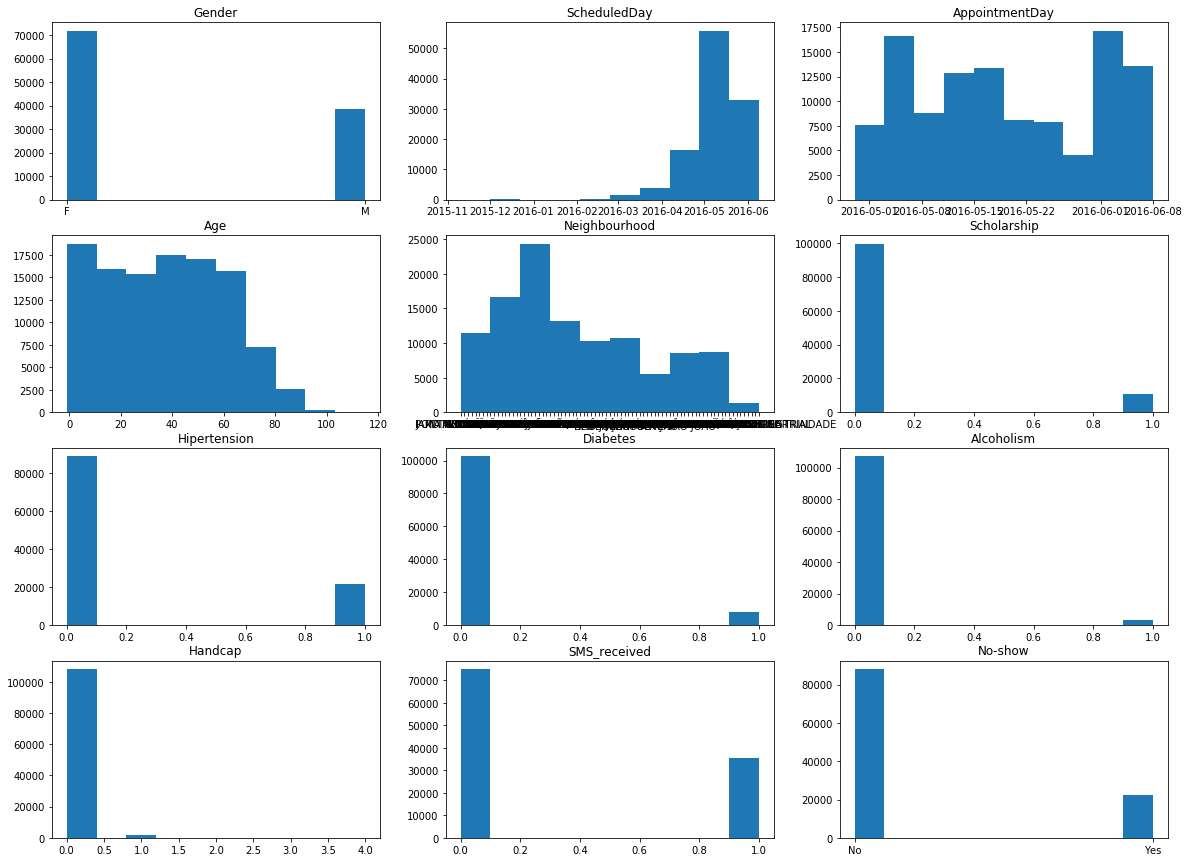

In [11]:
# Histograms
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 15))
ax[0, 0].hist(df['Gender'])
ax[0, 0].set_title('Gender')
ax[0, 1].hist(df['ScheduledDay'])
ax[0, 1].set_title('ScheduledDay')
ax[0, 2].hist(df['AppointmentDay'])
ax[0, 2].set_title('AppointmentDay')
ax[1, 0].hist(df['Age'])
ax[1, 0].set_title('Age')
ax[1, 1].hist(df['Neighbourhood'])
ax[1, 1].set_title('Neighbourhood')
ax[1, 2].hist(df['Scholarship'])
ax[1, 2].set_title('Scholarship')
ax[2, 0].hist(df['Hipertension'])
ax[2, 0].set_title('Hipertension')
ax[2, 1].hist(df['Diabetes'])
ax[2, 1].set_title('Diabetes')
ax[2, 2].hist(df['Alcoholism'])
ax[2, 2].set_title('Alcoholism')
ax[3, 0].hist(df['Handcap'])
ax[3, 0].set_title('Handcap')
ax[3, 1].hist(df['SMS_received'])
ax[3, 1].set_title('SMS_received')
ax[3, 2].hist(df['No-show'])
ax[3, 2].set_title('No-show')
plt.draw()

## Data preparation<a class="anchor" id="preparation"></a>
Based on the findings and the discussion from the first two sections, we can now start the pre-processing. As first general steps we will change column names and convert binary attributes into an object type.

Ask yourself at the beginning:
* *Which working steps are to be taken on the basis of the previous findings?*
* *What must be considered?*
* *What additional information could be relevant?*

In [12]:
# Drop IDs, rename columns in order to correct spelling and get 'cleaned' names
df = df.drop(['PatientId', 'AppointmentID'], axis = 1).rename(columns = {'Hipertension': 'Hypertension',
                                                                         'Handcap': 'Handicap',
                                                                         'SMS_received': 'SMSReceived',
                                                                         'No-show': 'NoShow'})

In [14]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMSReceived                int64
NoShow                    object
dtype: object

In [15]:
# Convert binary attributes to object type columns
df['Scholarship'] = df['Scholarship'].astype('bool')
df['Hypertension'] = df['Hypertension'].astype('bool')
df['Diabetes'] = df['Diabetes'].astype('bool')
df['Alcoholism'] = df['Alcoholism'].astype('bool')
df['SMSReceived'] = df['SMSReceived'].astype('bool')

In [16]:
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicap                   int64
SMSReceived                 bool
NoShow                    object
dtype: object

### Inconsistencies

In [17]:
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,0,False,No


In [ ]:
# Correct age of -1
df.loc[df['Age'] < 0, 'Age'] = 0                    # Other possibility is to drop this row

### Feature engineering

In [18]:
# Add columns with weekday names
df['WeekdayScheduled'] = df['ScheduledDay'].dt.weekday_name
df['WeekdayAppointment'] = df['AppointmentDay'].dt.weekday_name

In [19]:
# Calculate time difference in days between scheduling and appointment
df['Waiting'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date) / np.timedelta64(1, 'D')

In [20]:
# Extract hour when appointment was scheduled
df['ArrangementHour'] = df['ScheduledDay'].dt.hour

In [21]:
# Drop original date columns
df.drop(['ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [22]:
df.sample(5)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WeekdayScheduled,WeekdayAppointment,Waiting,ArrangementHour
82233,F,43,ITARARÉ,False,False,True,False,0,False,No,Wednesday,Wednesday,0.0,7
79196,F,3,TABUAZEIRO,False,False,False,False,0,True,No,Wednesday,Wednesday,14.0,16
93866,F,52,GRANDE VITÓRIA,True,True,False,False,0,False,No,Monday,Tuesday,1.0,14
33893,M,64,GURIGICA,False,False,True,False,0,True,Yes,Friday,Monday,17.0,10
98527,F,50,SANTA CECÍLIA,False,False,False,False,0,False,No,Wednesday,Friday,2.0,15


### Encoding

In [23]:
# Using pandas for columns with non-binary values, one hot encoding
df = pd.get_dummies(df, columns = ['Neighbourhood', 'WeekdayScheduled', 'WeekdayAppointment'])

In [24]:
# Using sklearn for binary columns, label encoding
from sklearn.preprocessing import LabelEncoder
for c in ['Gender', 'NoShow']:
    l = LabelEncoder()
    df[c] = l.fit_transform(df[c])

In [25]:
df

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Waiting,...,WeekdayScheduled_Saturday,WeekdayScheduled_Thursday,WeekdayScheduled_Tuesday,WeekdayScheduled_Wednesday,WeekdayAppointment_Friday,WeekdayAppointment_Monday,WeekdayAppointment_Saturday,WeekdayAppointment_Thursday,WeekdayAppointment_Tuesday,WeekdayAppointment_Wednesday
0,0,62,False,True,False,False,0,False,0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1,56,False,False,False,False,0,False,0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0,62,False,False,False,False,0,False,0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,8,False,False,False,False,0,False,0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,56,False,True,True,False,0,False,0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,56,False,False,False,False,0,True,0,35.0,...,0,0,1,0,0,0,0,0,1,0
110523,0,51,False,False,False,False,0,True,0,35.0,...,0,0,1,0,0,0,0,0,1,0
110524,0,21,False,False,False,False,0,True,0,41.0,...,0,0,0,1,0,0,0,0,1,0
110525,0,38,False,False,False,False,0,True,0,41.0,...,0,0,0,1,0,0,0,0,1,0


## Modeling and evaluation<a class="anchor" id="modeling"></a>
Now, after the data has been prepared for modelling, we can proceed with the application of different machine learning algorithms. For this purpose we will include a number of additional packages/modules. Think about this:

* *What can be done to obtain a well generalising model?*
* *How can I measure performance?*
* *What do I have to compare the performance with or is a metric absolute?*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [27]:
# Split features and label into two NumPy-arrays
X = df.drop(['NoShow'], axis = 1)
y = df['NoShow']

In [28]:
# Split the data for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.35,
                                                    random_state = 42)

### Decision tree

In [29]:
# Instantiate the classifier object and start training
clf_dt = DecisionTreeClassifier(max_depth = 4)  # restrict the tree fixed to four levels to get better display 
clf_dt = clf_dt.fit(X_train, y_train)

In [31]:
# Get the indication about the most important features
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(clf_dt.feature_importances_)[::-1]):
    print("{}: {:.3f}".format(name, importance))

Feature Importance:

Gender: 0.847
Age: 0.108
Scholarship: 0.024
Hypertension: 0.006
Diabetes: 0.005
Alcoholism: 0.005
Handicap: 0.003
SMSReceived: 0.002
Waiting: 0.001
ArrangementHour: 0.000
Neighbourhood_AEROPORTO: 0.000
Neighbourhood_ANDORINHAS: 0.000
Neighbourhood_ANTÔNIO HONÓRIO: 0.000
Neighbourhood_ARIOVALDO FAVALESSA: 0.000
Neighbourhood_BARRO VERMELHO: 0.000
Neighbourhood_BELA VISTA: 0.000
Neighbourhood_BENTO FERREIRA: 0.000
Neighbourhood_BOA VISTA: 0.000
Neighbourhood_BONFIM: 0.000
Neighbourhood_CARATOÍRA: 0.000
Neighbourhood_CENTRO: 0.000
Neighbourhood_COMDUSA: 0.000
Neighbourhood_CONQUISTA: 0.000
Neighbourhood_CONSOLAÇÃO: 0.000
Neighbourhood_CRUZAMENTO: 0.000
Neighbourhood_DA PENHA: 0.000
Neighbourhood_DE LOURDES: 0.000
Neighbourhood_DO CABRAL: 0.000
Neighbourhood_DO MOSCOSO: 0.000
Neighbourhood_DO QUADRO: 0.000
Neighbourhood_ENSEADA DO SUÁ: 0.000
Neighbourhood_ESTRELINHA: 0.000
Neighbourhood_FONTE GRANDE: 0.000
Neighbourhood_FORTE SÃO JOÃO: 0.000
Neighbourhood_FRADINHOS: 0.

In [32]:
# Print confusion matrix and accuracy
y_pred = clf_dt.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[30960     0]
 [ 7725     0]]
0.8003101977510663


In [33]:
# Calculate null accuracy
1 - y_test.mean()

0.8003101977510663

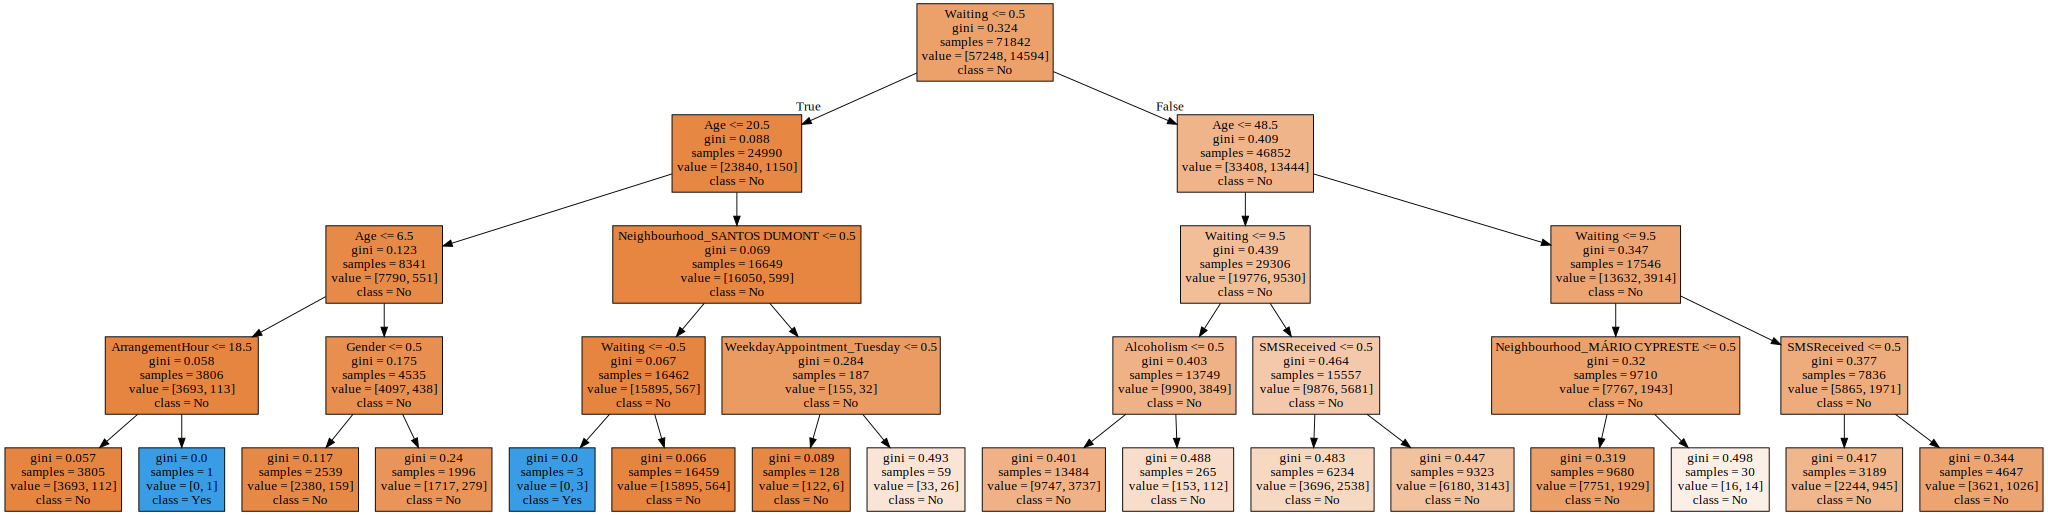

In [34]:
graph = Source(export_graphviz(clf_dt,
                               out_file = None,
                               feature_names = X.columns,
                               class_names = ['No', 'Yes'],
                               filled = True))
display(SVG(graph.pipe(format = 'svg')))

### Random forest

In [35]:
# Instantiate the classifier object and start training
clf_rf = RandomForestClassifier(random_state = 42)
clf_rf.fit(X_train, y_train)

/home/dennis/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
# Get the indication about the most important features
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(clf_rf.feature_importances_)[::-1]):
    print("{}: {:.2f}".format(name, importance))

Feature Importance:

Gender: 0.21
Age: 0.17
Scholarship: 0.13
Hypertension: 0.03
Diabetes: 0.02
Alcoholism: 0.01
Handicap: 0.01
SMSReceived: 0.01
Waiting: 0.01
ArrangementHour: 0.01
Neighbourhood_AEROPORTO: 0.01
Neighbourhood_ANDORINHAS: 0.01
Neighbourhood_ANTÔNIO HONÓRIO: 0.01
Neighbourhood_ARIOVALDO FAVALESSA: 0.01
Neighbourhood_BARRO VERMELHO: 0.01
Neighbourhood_BELA VISTA: 0.01
Neighbourhood_BENTO FERREIRA: 0.01
Neighbourhood_BOA VISTA: 0.01
Neighbourhood_BONFIM: 0.01
Neighbourhood_CARATOÍRA: 0.01
Neighbourhood_CENTRO: 0.01
Neighbourhood_COMDUSA: 0.01
Neighbourhood_CONQUISTA: 0.01
Neighbourhood_CONSOLAÇÃO: 0.01
Neighbourhood_CRUZAMENTO: 0.01
Neighbourhood_DA PENHA: 0.01
Neighbourhood_DE LOURDES: 0.01
Neighbourhood_DO CABRAL: 0.01
Neighbourhood_DO MOSCOSO: 0.01
Neighbourhood_DO QUADRO: 0.01
Neighbourhood_ENSEADA DO SUÁ: 0.01
Neighbourhood_ESTRELINHA: 0.01
Neighbourhood_FONTE GRANDE: 0.01
Neighbourhood_FORTE SÃO JOÃO: 0.01
Neighbourhood_FRADINHOS: 0.01
Neighbourhood_GOIABEIRAS: 0.01


In [37]:
# Print confusion matrix and accuracy
y_pred = clf_rf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[29333  1627]
 [ 6426  1299]]
0.7918314592219207


### Grid search

In [38]:
params = {'n_estimators': [10, 20, 30],
          'max_depth':[3, 4, 5]}
clf_rf2 = RandomForestClassifier(random_state = 42)
clf_grid = GridSearchCV(clf_rf2, params, cv = 5, n_jobs = -1, verbose = 1)
clf_grid.fit(X_train, y_train)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   13.8s finished


{'max_depth': 3, 'n_estimators': 10}
0.7968597756187189


## Homework
Please download the data set about campus recruitment [[3]](#roshan2020). Follow the CRISP-DM steps through to modeling. Use a Support Vector Machine combined with a Grid Search.

## References<a class="anchor" id="references"></a>

[1]<a class="anchor" id="sklearn2020"></a> The scikit-learn developers (2020). scikit-learn. Retrieved 2020-04-02 from https://scikit-learn.org/stable/

[2]<a class="anchor" id="jonihoppen2017"></a> JoniHoppen (2017). Medical Appointment No Shows, Why do 30% of patients miss their scheduled appointments?, Version 5. Retrieved 2020-05-04 from https://www.kaggle.com/joniarroba/noshowappointments.

[3]<a class="anchor" id="roshan2020"></a> Ben Roshan D (2020). Campus Recruitment, Academic and Employability Factors influencing placement, Version 1. Retrieved 2020-05-04 from https://www.kaggle.com/benroshan/factors-affecting-campus-placement.